In [10]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [11]:
from historical_data import get_all_historical_data
import datetime as dt


In [12]:
currency = "BTCUSDT"
df = get_all_historical_data(currency,dt.datetime(2013,12,1))


2013-12-01 00:00:00
2017-09-27 23:00:01
2017-11-08 12:00:01
2017-12-20 01:00:01
2018-01-30 15:00:01
2018-03-14 12:00:01
2018-04-25 01:00:01
2018-06-05 14:00:01
2018-07-17 21:00:01
2018-08-28 10:00:01
2018-10-08 23:00:01
2018-11-19 22:00:01
2018-12-31 11:00:01
2019-02-11 00:00:01
2019-03-24 19:00:01
2019-05-05 08:00:01
2019-06-16 07:00:01
2019-07-27 20:00:01
2019-09-07 17:00:01
2019-10-19 06:00:01
2019-11-29 23:00:01
2020-01-10 12:00:01
2020-02-21 07:00:01
2020-04-02 21:00:01
2020-05-14 12:00:01
2020-06-25 01:00:01
2020-08-05 17:00:01
2020-09-16 06:00:01
2020-10-27 19:00:01
2020-12-08 09:00:01
2021-01-19 02:00:01
2021-02-04 22:00:01


In [13]:
df.shape

(30407, 7)

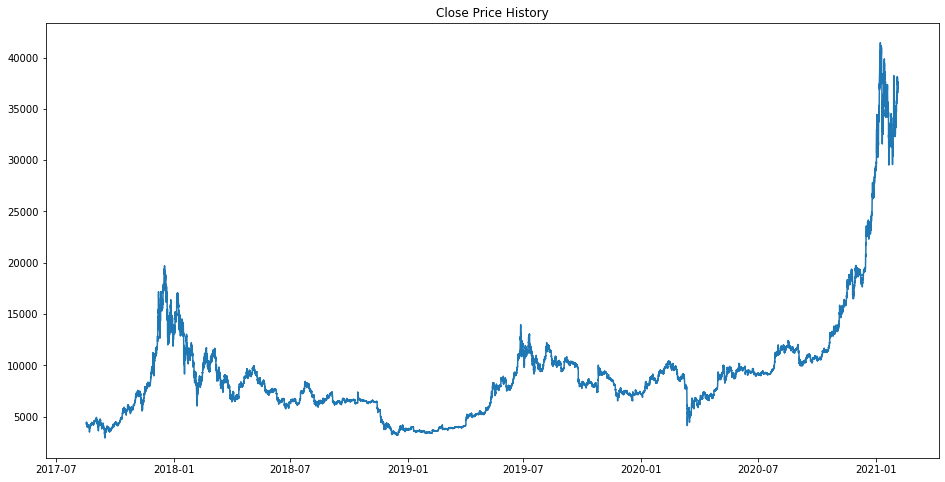

In [14]:
plt.figure(figsize=(16,8))
plt.title("Close Price History")
plt.plot((df["close"]))


In [19]:
data = df.filter(["close"])

#convert dataframe to np array
dataset = data.values
training_data_len = math.ceil(len(dataset)*.8)

In [22]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [24]:
train_data = scaled_data[0:training_data_len,:]
x_train = []
y_train = []

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    # if i <= 60:
    #     print(x_train)
    #     print(y_train)

In [28]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [30]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_train.shape

(24266, 60, 1)

In [32]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [33]:
model.compile(optimizer="adam", loss="mean_squared_error")

Instructions for updating:
Use tf.cast instead.


In [34]:
model.fit(x_train,y_train,batch_size=1,epochs=1)

Instructions for updating:
Use tf.cast instead.
 5141/24266 [=====>........................] - ETA: 29:19 - loss: 1.0890e-04

KeyboardInterrupt: 

In [35]:
 test_data = scaled_data[training_data_len - 60: , :]

 x_test = []
 y_test = dataset[training_data_len: , :]

 for i in range(60, len(test_data)):
     x_test.append(test_data[i-60:i, 0])
 

In [ ]:
x_test = np.array